In [53]:
import numpy as np
import scipy.integrate as integrate
from math import pi as PI
from math import log
import matplotlib.pyplot as plt
import sys
from collections.abc import Iterable

In [3]:
def integrate_rectangle(f, start, end, no_points):
    i = start
    output = 0.0
    interval = (end - start)/ no_points
    while i < end:
        output += interval*f(i+interval/2) if i + interval < end else (end-i)*f(i+interval/2)
        i += interval
    return output

In [4]:
def gauss_legendre(f: callable, a, b, n):
    # Calculate the nodes and weights of the Gauss-Legendre quadrature
    nodes, weights = np.polynomial.legendre.leggauss(n)

    # Map the nodes 
    mapped_nodes = ((b - a) * nodes + b*r[1] - a*r[0]) / (r[1] - r[0])
    mapped_weights = (b - a) / (r[1] - r[0]) * weights
    
    # Calculate the integral
    integral = sum(mapped_weights * f(mapped_nodes))
    
    return integral


In [5]:
def fkfun(x0,a):
    return (1/np.sqrt(a))*(np.arctan((1-x0)/np.sqrt(a))+np.arctan(x0/np.sqrt(a)))

# Funkcja 4/(1+x^2)

In [6]:
def f1(x):
    return 4/(1 + x*x)

In [50]:
def f2(x):
    if isinstance(x,Iterable):
        for i in range(len(x)):
            if x[i] == 0:
                x[i] = 1
    elif x == 0:
        return 0
    return np.sqrt(x)*np.log(x)

In [8]:
def f3(x):
    return 1/((x-0.3)**2+0.001) + 1/((x-0.9)**2+0.004) - 6

In [51]:
def integrate_all(f,rval):
    # n = 26
    # y_M = np.zeros(n)
    # y_T = np.zeros(n)
    # y_S = np.zeros(n)
    # err_M = []
    # err_T = []
    # err_S = []
    # hs = np.empty(n)
    # for m in range(1, n):
    #     x_space = np.linspace(0, 1, 2**m + 1)
    #     y_space = np.array([f(x) for x in x_space])
    #     hs[m] = ( 1/(2**m+1))
    #     y_M[m] = integrate_rectangle(f, 0, 1, 2**m + 1)
    #     y_T[m] = integrate.trapz(y_space, x_space)
    #     y_S[m] = integrate.simps(y_space, x_space)
    #     # print("m =", m, "M :", y_M[m], ", T : ", y_T[m], ", S : ", y_S[m])
    #     err_M.append((abs(rval - y_M[m])/rval))
    #     err_T.append((abs(rval - y_T[m])/rval))
    #     err_S.append((abs(rval - y_S[m])/rval))

    # th_mid = log(err_M[5]/err_M[4])/log(hs[5]/hs[4])
    # th_tra = log(err_T[5]/err_T[4])/log(hs[5]/hs[4])
    # th_sim = log(err_S[5]/err_S[4])/log(hs[5]/hs[4])
    # print("Rząd zbieżności emrvalryczny - prostokąty", round(th_mid, 2))
    # print("Rząd zbieżności emrvalryczny - trapezy", round(th_tra, 2))
    # print("Rząd zbieżności emrvalryczny - Simpson", round(th_sim, 2))


    # hmin_m = hs[err_M.index(min(err_M))]
    # hmin_t = hs[err_T.index(min(err_T))]
    # hmin_s = hs[err_S.index(min(err_S))]
    # print("hmin - prostokąty", "{:.3}".format(hmin_m))
    # print("hmin - trapezy", "{:.3}".format(hmin_t))
    # print("hmin - Simpson", "{:.3}".format(hmin_s))

    n = 10
    err_GL = np.empty(n)
    n_space = np.empty(n)
    for m in range(1, n):
        err_GL[m] = (abs(integrate.fixed_quad(f, 1/2, 3/4, n=2**m+1)[0] - rval)/(rval))
        n_space[m] = (m)


    n = 15
    y_AT = np.empty(n)
    y_AG = np.empty(n)
    err_AT = np.empty(n)
    err_AG = np.empty(n)
    for m in range(n):
        x_space = np.linspace(0, 1, 2**m + 1)
        y_space = np.array([f(x) for x in x_space])
        tol = 10**-m
        y_AT[m],err_AT[m] = integrate.quad_vec(f,0,1,epsrel=tol,quadrature='trapezoid')
        y_AG[m],err_AG[m] = integrate.quad_vec(f,0,1,epsrel=tol,quadrature='gk21')


    x_26 = [i for i in range(25)]
    x_10 = [i for i in range(10)]
    x_15 = [i for i in range(15)]
    print(err_AT)
    # plt.plot(x_26, err_M, label="Prostokąty")
    # plt.plot(x_26, err_T, label="Trapezy")
    # plt.plot(x_26, err_S, label="Simpson")
    plt.plot(x_10, err_GL, label="Gauss-Legendre")
    plt.plot(x_15, err_AT, label="Adaptacyjne trapezy")
    plt.plot(x_15, err_AG, label="Adaptacyjne Gauss-Kronrod")
    plt.semilogy()
    plt.legend()

[1.70588235e-02 1.70588235e-02 2.35380352e-03 3.47728558e-04
 3.84220897e-05 3.90468448e-06 3.91769989e-07 3.92487213e-08
 3.92532006e-09 5.64092204e-10 5.63958121e-10 5.63958121e-10
 5.63958121e-10 5.63958121e-10 5.63958121e-10]


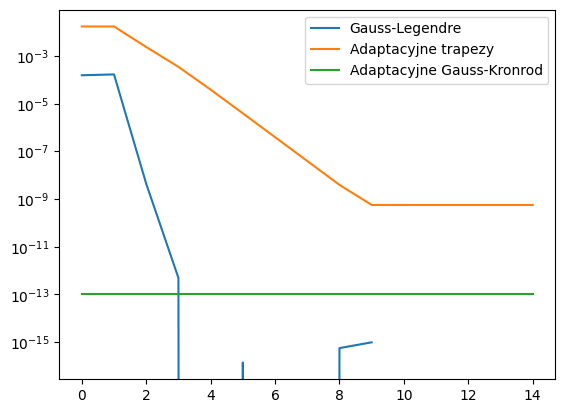

In [29]:
integrate_all(f1,PI)

/tmp/ipykernel_311/2081872650.py:6: RuntimeWarning: divide by zero encountered in log
  return np.sqrt(x)*np.log(x)
/tmp/ipykernel_311/2081872650.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  return np.sqrt(x)*np.log(x)


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


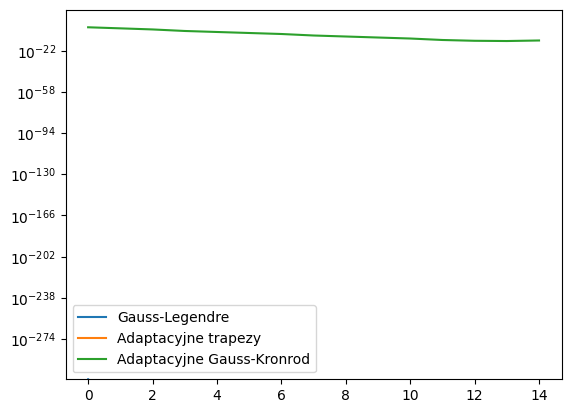

In [54]:
integrate_all(f2,-4/9)

Rząd zbieżności emrvalryczny - prostokąty 4.22
Rząd zbieżności emrvalryczny - trapezy 4.23
Rząd zbieżności emrvalryczny - Simpson 3.7
hmin - prostokąty 5.96e-08
hmin - trapezy 5.96e-08
hmin - Simpson 6.1e-05
[5.84461887e+00 1.09670644e+00 1.57404529e-01 1.58572744e-02
 1.60174284e-03 1.60238422e-04 1.60260718e-05 5.96785587e-06
 5.96785587e-06 5.96785587e-06 5.96785587e-06 5.96785587e-06
 5.96785587e-06 5.96785587e-06 5.96785587e-06]


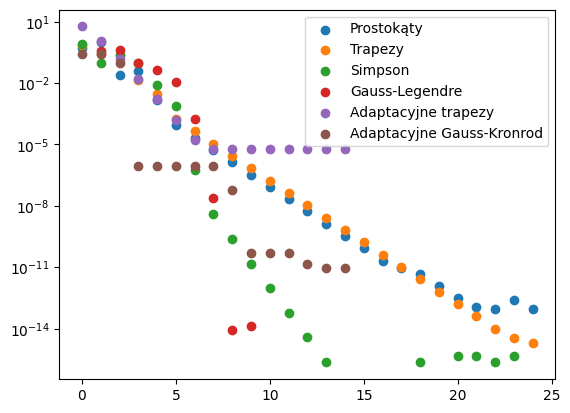

In [16]:
rval = fkfun(0.3,0.001) + fkfun(0.9,0.004) - 6
integrate_all(f3,rval)